In [1]:
import pandas as pd 
import numpy as np 
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
lemmatizer = WordNetLemmatizer()


In [3]:
def txt_process(txt):
    txt=txt.lower()
    txtwithoutpunch =  [i for i in txt if i not in string.punctuation]
    txtjoin = "".join(txtwithoutpunch)
    txtjoin= txtjoin.split()
    stop=stopwords.words('english')
    afterstop=[i for i in txtjoin if i not in stop]
    tokenised =[lemmatizer.lemmatize(i,'v') for i in afterstop]
    return " ".join(tokenised)

In [4]:
df=pd.read_csv("spam.csv")

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
x=df["Message"].apply(txt_process)
y=df["Category"]  #.map({"harm":0,"spam":1})

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
countvector = CountVectorizer()
x_vector = countvector.fit_transform(x)

In [8]:
x_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5572, 8489))

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x_vector,y,test_size=.2,random_state=42)

In [10]:
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       966
        spam       0.89      0.94      0.92       149

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



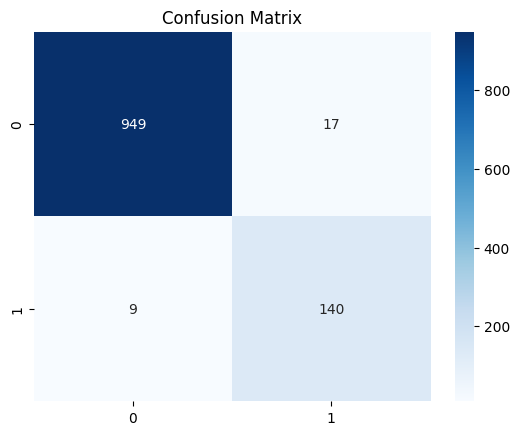

In [12]:
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred),annot =True,fmt = "d",cmap = "Blues")
plt.show()


In [ ]:
print(round(cross_val_score(MultinomialNB(),x_vector,y,cv=7).mean()*100,2))

97.64895908111988


In [14]:
import pickle


data = {
    'model': model,
    'vectorizer': countvector,
}



with open("spam.pkl", 'wb') as file:
    pickle.dump(data, file)
